# The Social Implications of Food
by Rachel Lu (rbl83)

***
## Introduction
This project for INFO 2950 provides an analysis of Yelp, a crowd-sourced business review platform. The dataset I'm using is a subset of information stored on Yelp, including businesses, users, and reviews in Canada and the United States. I focused on deriving insights from the restaurants that users patronize and their friends. Specifically, my research question was: how do social relationships influnce user behavior on the review platform? Two aspects of this question -- user growth and social preferences -- were investigated through two hypotheses. User growth is measured by the number of users who are registered to the platform over time. User preferences are defined by how much does a user like a particular category or cuisine; to measure preference, I calculated the total number of stars given to a particular category by the user divided by total number of stars given in reviews to all categories. 

My first finding on user growth stems from a linear regression analysis of when users join the platform. From the regression model and statistical test, there is a statistically significant positive relationship between time and the number of Yelp users joining the platform. From my regression fit, an estimated 2 out of the 6000 total users, joined each day from over the past 14 years. However, there seems to be a non-linear growth rate which is not best modelled by the linear regression model. In particular, user growth was slower at the launch of the platform and has begun slowing since approximately 2016. The slowed user growth bodes poorly for Yelp as a decline in growth almost certainly indicates slowed growth for the company at large, though this could be counteracted by a consistently maintained active user base. 

My second finding looks more into the social aspect of Yelp to see whether it is feasible to predict a user's prefernce based on their friends' preferences. I created a Ordinary Least Squares regression model to predict how likely soemone is to like "American (New)" cuisine -- which is one of the top categories on Yelp -- based on how much their friends preference each of the top twenty categories, and then compared the result to their actual preference metric. There appeared to be some predictive value in doing this, but the results demonstrated only some of the categories were useful in this analysis, while incorporating all twenty categories likely led to overfitting. Therefore, the results showed some promise for a future recommendation system, but futher fine-tuning and a larger dataset are be needed to find the nuanced relationships between categories.  

***
## Data Description
There are two dataframes within my analysis-ready dataset: Preferences (yelp_user_prefs.csv) and Categories (yelp_user_categories.csv).

- The observations (rows) and the attributes (columns):
    - Preferences: Each observation in the table is a separate Yelp user. 
      The attributes are:
        - user_id: a unique alphanumeric string
        - name: their first name, a string 
        - yelping_since: the data the user joined Yelp, an object
        - review_count: the number of reviews they have written on Yelp, an integer
        - average_stars: the average stars they gave across all their reviews, a float
        - friends: a comma-separated list of user_ids corresponding to their friends, a string
        - friend_count: the total number of friends they have, an integer
        - various preferences: numerous columns to represent how much a user likes each possible restaurant category, a float
            - this is the total number of stars given to a particular category divided by total number of stars given in reviews to all categories. 
            - note that the sum of all values in a row can be greater that 1 since businesses can be cross-listed for multiple categories.
    - Categories: Each observation in the table is a separate category of restaurants reviewed for a specific user.
      The attributes are:
      - user_id: the user this category corresponds to, a string
      - categories: the category of the business that was reviewed, a string
      - count: the number of reviews for that user in that specific category
      - avg_stars: the average star rating of the reviews for that user in that specific category
- Regarding any privacy concerns for working with user data, the names included are only first names so the information is not easily personally identifiable. Furthermore, these profiles and reviews are all hosted on a public platform so users previously agreed (and expected) to have their thoughts and opinions shared with the public.
- This dataset was created for the purposes of individual, educational or academic use as well as for use in the Yelp Open Dataset Challenge. I believe they created this dataset to promote more user engagment with the platform, particularly from a developer perspectice through their API, and also to highlight the breadth of content that they have to offer.
- Yelp, a crowd-sourced business review platform, funded and created this dataset. It is a subset of the information stored on Yelp, including businesses, users and reviews, focusing on businesses in Canada and the United States. 
- When Yelp recorded and selected the set of reviews to display, Yelp might have screened the reviews to choose more thorough reviews and those that contain appropriate language in order to represent the platform in a more positive light. Yelp probably excluded many of the inactive users and businesses in order to give a more robust set of current data for users to analyze.
- Regarding preprocessing for my project, I filtered the data to contain only more active restaurants and users in order to have more useful data; many Yelp users don't have many reviews or friends, which would make it hard to draw conclusions on their preferences and friends. Aside from filtering the user table to be only contain the relevant users, I also aggregated the business and review information in order to give each review more context and summarize an individual's preferences.
- Yelp was the only organization involved in the data collection, and I had to sign a user agreement form on the site so that they were aware of its use for educational purposes.
- The raw source data was generously provided on [Yelp's website](https://www.yelp.com/dataset). The dataset that I created, derived from the orginal data, is relatively large so it is uploaded to [Box](https://cornell.box.com/s/fsznwuifvg095h3xr744hni1i2mezxhy).

***
## Pre-registered Analyses

### Hypothesis 1: User growth on the Yelp platform is exponential. 
By analyzing how the size of the user base grows over time, I can learn about Yelp's growth potential. 
- There is a theory called Metcalf's Law<sup>1</sup> which states that the value of a social network is proportional to $n^2$ with $n$ being the number of users. This reasoning comes from the idea that the number of posssible connections within the network is equivalent to $n \times n$, with usage and revenue being proportional to the number of connections.
- By seeing how Yelp's user base is growing over time and assuming Metcalf's Law is an accurate estimate, we can roughly project the future value of the firm.
- Additionally, more users means more data. In data science, more data often makes finding statistically significant results easier and helps create more robust machine learning models. Based on user growth, I aim to see whether there is a promising potential for more effective social network analysis, such as the work I plan to do in hypothesis two, in the future.

### Hypothesis 2: Closer friends will have more similar food preferences.
I will create a model showing whether there is a relationship between the degree of friendship and similarity in food category preferences.
- Leveraging the "friends" feature of users' profiles, users can be compared to their direct friends versus 2nd-degree connections (i.e. friends of friends), or even more distantly related users. 
- Similar food preferences will be defined by a metric such as the proportion of stars given to a category by a user; specifically, preference for a category can be represented as the total number of stars given to a particular category (e.g. "American") divided by total number of stars given in reviews to all categories by a particular user.  

By determining whether the degree of friendship is predictive to food preference similarity, I will discover whether friends have more similar tastes. 
- From a commercial perspective, this knowledge can be useful to improve future recommendation algorithms by providing more insight into how person's friends' preferences should be weighted. 
- From a social perspective, a relationship between tastes and friendship may indicate that people are more likely to be friends if they have similar food interests or vice versa. This could be an interesting perspective to explore in determining whether people with similar tastes will become closer friends or even more compatible in dating. 

***
## Data Analysis

### Summary Statistics

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [ ]:
users = pd.read_csv("yelp_user_prefs.csv")
categories = pd.read_csv("yelp_user_categories.csv")

#### User Preferences

Number of restaurant categories for users: 397


Text(0.5, 0, 'Categories Reviewed')

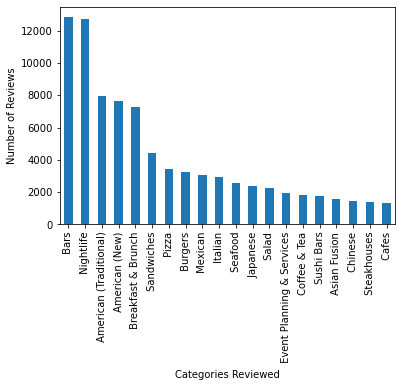

In [87]:
user_categories = categories.groupby(['categories'])['count'].sum().sort_values(ascending=False)
print("Number of restaurant categories for users:", len(user_categories))
user_categories[:20].plot.bar()
plt.ylabel('Number of Reviews')
plt.xlabel('Categories Reviewed')

The above bar chart shows the frequency of reviews for the most popular 20 out of nearly 400 restaurant categories reviewed by users. Notably, bars/nightlife seem to be the most common businesses, followed by American, Mexican, and Italian cuisines. Given that we are exploring data from only the United States and Canada, it makes sense that we can see very American-centric cuisine at the forefront.

In [88]:
print("Standard deviation of reviews per restaurant category:", np.std(user_categories))

Standard deviation of reviews per restaurant category: 1209.2719613562037


There is a considerable standard deviation of approximately 1209 reviews between different categories. This demonstrates that the categories differ greatly in popularity, and that users have a clear preference for certain types of restaurants.

#### Relationship Between Stars and Categories

<AxesSubplot:xlabel='Average Star Rating per Category', ylabel='Number of Categories'>

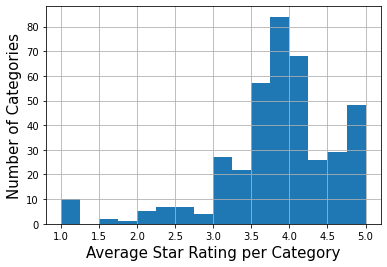

In [89]:
weighted_avg = categories.copy()
weighted_avg["weighted_stars"] = weighted_avg["count"]*weighted_avg["avg_stars"]

category_grp = weighted_avg.groupby('categories')
avg_stars_per_category = category_grp["weighted_stars"].sum()/ category_grp["count"].sum()

plt.xlabel("Average Star Rating per Category", fontsize=15)
plt.ylabel("Number of Categories",fontsize=15)
avg_stars_per_category.hist(bins = 16)

This histogram compares the number of categories to their average star rating, with the large majority of categories have an average star rating of 3 to 5 stars. I set the bin number to be in .25 star intervals to better see the distribution of categories and stars. The most common average star rating falls in the 3.75 to 4 star range. However, on the tail ends of the histograms, one can note there are clearly some categories that users usually like more or less often compared to others. For business owners, I would recommend that they target opening a restaurant in one of the highly rated categories or at least optimizing their Yelp business profiles to address this disparity.

#### Friends
It's hard to determine whether friendships on Yelp (or even in life) are genuine, but I limited the users during data cleaning to those with friend amounts in a range of 20 to 40. This was reasoned by the idea that too few friends would make it hard to draw insights from, while too many friends risks the person not actually being real-life friends with their Yelp friends.

Text(0, 0.5, 'Number of Friends')

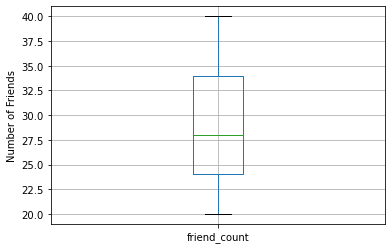

In [90]:
users.boxplot(column ='friend_count')
plt.ylabel('Number of Friends')

Following this data cleaning, this boxplot shows the distribution of users with friends within the range of 20 to 40 people, with the median number of friends being about 28 friends.

#### Correlations in User Profiles
I wanted to know if there was any relationship between review counts, average stars per user, and friend counts. I thought that users who review a lot of restaurants may be harsher critics which would show a correlation between review count and average stars. However, the below correlation matric indicates there is either an extremely weak or no correlation between any of these variables.

In [91]:
users[["review_count","average_stars","friend_count"]].corr()

,review_count,average_stars,friend_count
review_count,1.000000,0.003215,-0.004622
average_stars,0.003215,1.000000,0.013599
friend_count,-0.004622,0.013599,1.000000


The lack of correlation is good to know since it reduces any concerns that people with too many or too little friends/reviews may behave differently compared to other users

### User Growth Model

In [92]:
# sort the dataframe by date
users = users.sort_values(by=['yelping_since'])
users.yelping_since = pd.to_datetime(users.yelping_since)
users.head()

,user_id,name,review_count,yelping_since,average_stars,friends,friend_count,Acai Bowls,Active Life,Afghan,...,Tobacco Shops.1,Vegan.1,Vegetarian.1,Venues & Event Spaces.1,Vietnamese.1,Waffles.1,Wedding Planning.1,Whiskey Bars.1,Wine Bars.1,Wraps.1
0,SkHwJm44tvMts6AEE7N5wg,Jerry,34,2006-01-20 18:31:56,3.15,"TSxpgqzG0u38CGyyLfSAAg, HJs_HxdqUC8hpMBJxXVgGw...",26,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,U-RbGlIYIrFz_YyoaCoWdQ,Eugene,15,2006-02-09 04:49:34,3.53,"mJZeGh_4Xri-jHVOfHtnCg, V88T7Hvwn2DPWfmZWKlUVw...",29,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3U4iejBZ_VJJRSA64z_5VQ,Stefan,20,2006-03-15 03:01:59,2.62,"T51Wxd2LnUcUNkYCOGYlZw, jJ_3QQ6up1U1FSiuTRyx9Q...",37,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ip2PLIVv9PFUCURvXQn7_Q,Jeff,23,2006-04-27 23:04:32,3.75,"y7t_CXQx-OAxQ4AWXU_GaQ, l3u5GrSXWbwqGKMUIWK6ig...",22,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ypUDNN_4iD-XWsxY7PpsaA,Dave,33,2006-06-12 05:43:10,3.06,"OK4C8FONOju2D3RSBacB0Q, 62GNFh5FySkA3MbrQmnqvg...",39,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'User Growth over Time')

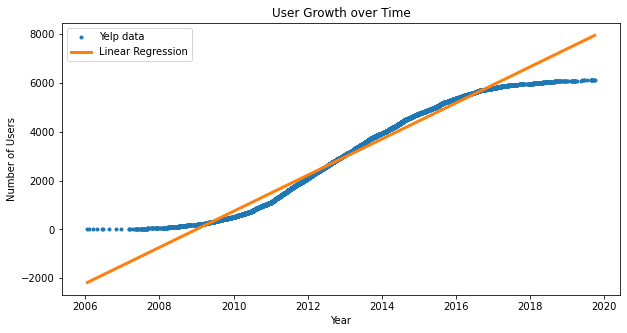

In [93]:
# plot real data
fig = plt.figure(figsize=(10, 5))
user_amt = np.asarray(list(range(1,len(users)+1,1)))
plt.plot_date(users.yelping_since,user_amt, label="Yelp data", markersize="3")
plt.ylabel('Number of Users')
plt.xlabel('Year')

# plot regression line
import datetime as dt
x = users.yelping_since.map(dt.datetime.toordinal)
reg = LinearRegression().fit(x.values.reshape(-1,1), user_amt)
pred = reg.predict(x.values.reshape(-1,1))
plt.plot(users.yelping_since, pred, linewidth=3, label="Linear Regression")
plt.legend()
plt.title("User Growth over Time")

In the above graph, I modelled the relationship between number of users on Yelp over time. Given that every user has a corresponding date that they joined the platform, the total number of users over time can be aggregated and plotted. After getting the data points for past users, I used linear regression to analyze user trends over time and predict future behavior.

In [94]:
## Analyze regression values
print("Slope for regression line is {slope:.0f} users per day".format(slope = reg.coef_[0]))
print("Intercept for regression line is {intercept:.0f} users".format(intercept = reg.intercept_))

Slope for regression line is 2 users per day
Intercept for regression line is -1483316 users


In the linear regression model for user growth, this subset of around 6000 Yelp users grows at a rate of about two users per day. By observation of the graph, there appears to be a non-linear relationship in the actual data, with the model consistently underestimating the number of users in Yelp's early days and overestimating the number of users in recent year. The actual data follows a more sigmoid-like pattern, while the linear regression is most similar to the data from 2010 to 2016 rather than the data at the tail ends. Quantitatively, the regression line's inaccuracies on the tail ends of the data can be see from the large negative intercept of -1483316 users, which is clearly impossible.

### Food Preferences Model

After considering how Yelp's user base has grown over the years, I then wanted to know: what is the value of more users on the platform? Specifically, is there a potential for Yelp to become a recommendation system based on your friends? In this food preferences model, I aim to see whether we can predict what someone likes based on what their friends enjoy. 

As a measure of preference, I chose to find the proportion of total number of stars given to a particular category (e.g. "American") compared to the total number of stars given in reviews to all categories by a particular user. If a user usually gives high ratings to a certain category and low ratings to other categories, then their preference metric would be close to 1 in that category. 

In [95]:
# find preferences for first degree friends
frnds = users[["user_id","friends",'Japanese', 'American (New)','American (Traditional)']].copy()
frnds = frnds.rename(columns={'Japanese': 'user_Japanese', 'American (New)': 'user_American (New)','American (Traditional)':'user_American (Traditional)'})
frnds['friends'] =frnds.apply(lambda row: row['friends'].split(','), axis=1)
frnds = frnds.explode('friends')
# aggregate preferences for friends
fstDeg = frnds.merge(users, left_on='friends', right_on='user_id').drop(columns=['user_id_y','name','review_count','yelping_since','average_stars', 'friends_x', 'friends_y', 'friend_count'])
fstDeg.groupby("user_id_x").mean()
fstDeg.head()

,user_id_x,user_Japanese,user_American (New),user_American (Traditional),Acai Bowls,Active Life,Afghan,African,American (New),American (Traditional),...,Tobacco Shops.1,Vegan.1,Vegetarian.1,Venues & Event Spaces.1,Vietnamese.1,Waffles.1,Wedding Planning.1,Whiskey Bars.1,Wine Bars.1,Wraps.1
0,oYBZOXkPEUx9oTTQgC7sVA,0.000000,0.000000,0.116959,0.0,0.0,0.0,0.0,0.000000,0.173077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,gJpvYNvxsyJxN-uiznbl6Q,0.077272,0.057954,0.000000,0.0,0.0,0.0,0.0,0.169801,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,yFY-IS9PS-l7uGajVSoXjw,0.000000,0.000000,0.062112,0.0,0.0,0.0,0.0,0.061945,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,dT_uECvdKeIWqFKoSbj2Vw,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.059737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sc9FndohvKY8BVnkfS-thg,0.000000,0.213025,0.000000,0.0,0.0,0.0,0.0,0.235294,0.105882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Above is a table of user preferences relative to the preferences of their friends. Specifically, for a given user (user_id_x), I listed their preferences for Japanese, American (New), and American (Traditional) cuisine in the next three columns and then the mean of the preferences of all their Yelp friends for every category. 

First, I looked into whether a user's preferences for different categories may be correlated. 

In [96]:
fstDeg[["user_Japanese",'user_American (New)','user_American (Traditional)']].corr()

,user_Japanese,user_American (New),user_American (Traditional)
user_Japanese,1.000000,-0.162751,-0.151865
user_American (New),-0.162751,1.000000,0.692374
user_American (Traditional),-0.151865,0.692374,1.000000


I hypothesized that if someone likes Modern American fare, they may also like Traditional American fare. However, if they like Japanese food, I would not be able to draw any conclusion about whether they like American food since those cuisines are very different. After performing a correlation test, this relationship was further supported as there was basically zero correlation observed between Japanese cuisine versus American (New) and American (Traditional); specifically, there was a correlation of -0.162751 and -0.151865 between them, respectively. On the other hand, the correlation coefficient between Traditional and New American is 0.692374, which shows a moderate positive relationship. 

Building on the idea that some categories are related to others, I checked if a person's friends preferences can predict how likely a person is to enjoy American (New) cuisine. Given that having too many variable in a regression model can lead to overfitting, I only looked at the influence of the top twenty categories.

In [97]:
# Get the top twenty most popular categories
topTwenty = [x.strip() for x in user_categories[:20].index.tolist()]

# Get every users' friends' preferences for the top twenty categories
X = fstDeg[topTwenty]

# Perform OLS regression 
X = sm.add_constant(X) 
preference_model = sm.OLS(fstDeg['user_American (New)'], X).fit()

Using the statsmodels Python library, I performed a multivariate ordinary least squares regression analysis to use the preferences of friends in various categoris to predict a user's preference for American (New) cuisine.

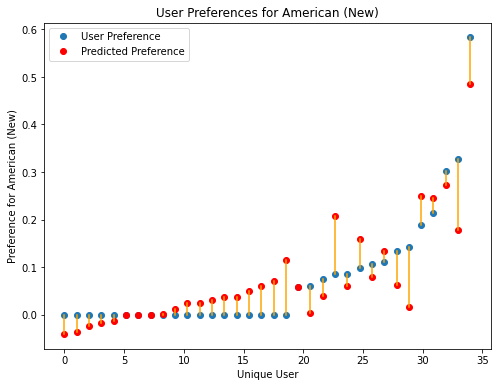

In [123]:
fig, ax = plt.subplots(figsize=(8,6))
ols_x = np.linspace(0, 34, 34)
actual_y = fstDeg['user_American (New)']
pred_y = preference_model.fittedvalues

# sort the actual data and predicted data based on the actual data
ys = sorted(zip(actual_y, pred_y))
sorted_actual = [i[0] for i in ys]
sorted_pred = [i[1] for i in ys]
ax.plot(ols_x, sorted_actual, 'o', label="User Preference")
ax.plot(ols_x, sorted_pred, 'o', label="Predicted Preference", color="red")
ax.legend(loc='best');
ax.set_xlabel("Unique User")
ax.set_ylabel("Preference for American (New)")
ax.set_title("User Preferences for American (New)")

for i in range(len(ols_x)):
    ax.plot([ols_x[i],ols_x[i]],[sorted_actual[i],sorted_pred[i]], color="orange")

I plotted the actual user preference (blue) and the predicted preference (red) on the same graph for each user, sorted by ascending actual user preference and then sorted by predicted preference in the case of a tie. The difference between the predicted and test values can be see by the orange lines. 

In [125]:
print("Average distance between actual and predicted preference:", np.mean(np.abs(actual_y - pred_y)))

Average distance between actual and predicted preference: 0.04479877663400603


Further investigating the performance of the model, the average predicted user preference was off from the actual preference by approximately 0.0448. This value is represented in the graph by the average length of the orange lines.

Overall, the predicted values were somewhat similar to the actual values, but there was a notable amount of error. From the graph, we can see that over half of the users have an actual preference score of zero, with a range of predicted preferences mostly from -0.5 to 0.1. In these cases, the prediction reflects that these users are likely to not be fans of American cuisine. As the user's actual preference for American increases, there is a rough upward trend in predicted values as well, although there are some fluctuations. One notable outlier is a single user who gave nearly 60% of their stars to American (New) restaurants; the predicted preference in this case is also far above other users' predictions at 50%, which shows the model does have some predictive capabilities. 

***
## Evaluation of Significance
### User Growth Model

To see whether the user growth over time is statistically significant, I calculated the R-squared value of the regression model along with the test statistic to test the null hypothesis that that these dates and number of users are drawn from independent samples.

In [99]:
print("R-squared value for regression line is {score:.3f}".format(score = reg.score(x.values.reshape(-1,1), user_amt)))

R-squared value for regression line is 0.969


Judging by the high R-squared value between time and the number of users, there is a strong relationship between the year and the number of users on Yelp. However, since it is not equal to one, there is still some other factors causing variablitiy within the user growth model. For example, changes in the socioeconomic climate may inflence people to eat out more or less, which would then influence how many users sign up for Yelp.

In [100]:
ttest_ind = stats.ttest_ind(x, user_amt)
print("T-test statistic:",ttest_ind[0], "and p-value:",ttest_ind[1])

T-test statistic: 29164.37594653551 and p-value: 0.0


Based on the large T-value of 29164, there is a large difference between the sample data and the null hypothesis. Additionally, there is have a very low p-value, indicating a strong relationship between the date and the number of users. Although the linear regression line didn't seem to be a good fit for the entire time period, further investigation of nonlinear models could lead to a promising predictor for user growth.

### Food Preferences Model

We can now use the summary statistics of the Ordinary Least Squares Regression model to see how effective our second model is at predicting a user's preference for American (New) cuisine based on their friends.

In [101]:
preference_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     user_American (New)   R-squared:                       0.775
Model:                             OLS   Adj. R-squared:                  0.430
Method:                  Least Squares   F-statistic:                     2.245
Date:                 Wed, 25 Nov 2020   Prob (F-statistic):             0.0690
Time:                         18:07:41   Log-Likelihood:                 48.069
No. Observations:                   34   AIC:                            -54.14
Df Residuals:                       13   BIC:                            -22.09
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0675      0.052      1.307      0.214      -0.044       0.179
Bars                         -0.6375      0.494     -1.291      0.219      -1.704       0.429
Nightlife                     0.6570      0.528      1.244      0.235      -0.484       1.798
American (Traditional)       -0.1394      0.331     -0.422      0.680      -0.854       0.575
American (New)                0.3802      0.290      1.309      0.213      -0.247       1.008
Breakfast & Brunch           -0.2776      0.416     -0.668      0.516      -1.176       0.621
Sandwiches                   -0.6401      0.542     -1.180      0.259      -1.812       0.532
Pizza                         0.1771      0.635      0.279      0.785      -1.195       1.549
Burgers                      -0.3837      0.680     -0.564      0.582      -1.853       1.085
Mexican                      -0.2940      1.962     -0.150      0.883      -4.533       3.945
Italian                       1.7565      0.650      2.703      0.018       0.352       3.160
Seafood                      -0.1493      0.595     -0.251      0.806      -1.435       1.137
Japanese                     -0.5264      1.010     -0.521      0.611      -2.708       1.656
Salad                         0.1894      0.873      0.217      0.832      -1.696       2.075
Event Planning & Services     0.4184      0.998      0.419      0.682      -1.738       2.574
Coffee & Tea                 -0.4481      0.816     -0.549      0.592      -2.211       1.315
Sushi Bars                   -0.0793      0.855     -0.093      0.928      -1.927       1.768
Asian Fusion                 -1.8031      1.287     -1.401      0.185      -4.583       0.976
Chinese                       0.0077      1.510      0.005      0.996      -3.255       3.270
Steakhouses                   0.3317      1.487      0.223      0.827      -2.880       3.544
Cafes                         1.9967      0.966      2.067      0.059      -0.090       4.083
==============================================================================
Omnibus:                        2.041   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.044
Skew:                           0.378   Prob(JB):                        0.593
Kurtosis:                       3.405   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Upon first inspection of the R-squared value of 0.775, one is led to believe that the model does a fairly good job of fitting the given data. However, overfitting is a big concern with the small sample size of users and the large number of predictor variables, which in this case are the twenty variables used for different categories. The adjusted R-squared value, accounts for the number of terms in a model, where adding more useless variables will decrease the R-squared value. Noting that the R-squared value is 0.430, there are clearly some non-predictive variables incorporates into my model. This makes sense since a preference for some categories are not indicative of other categories; this is further supported by my previous finding that American and Japanese cuisine have very little to no correlation. 

As an indicator of which categories are related to New American cuisine, we can look at the p-values. Italian and Cafes have the lowest p-values at 0.018 and 0.059, respecitively, which suggests that these categories are the most informative. Surprisingly, whether that friends like American (New) cuisine is not as informative as that feature has only the fourth lowest p-value at 0.213. A sampling of other categories also have a p-value of approximately 0.2: Bars, Nightlife, Sandwhiches, and Asian Fusion. These named categories all show some evidence supporting the hypothesis that we can predict preferences based on a user's friends' behavior, and would be potential categories to use in a more refined model to determine if someone likes American (New) food. However, one must be wary of "p-hacking" -- an unfounded process of selecting statistical analyses to misrepresent nonsignificant results as significant -- and pursue additional datasets to validate the relationship between these cuisines. 

***
## Interpretations and Conclusions
### User Growth Model
From the regression model and statistical test, there is a statistically significant positive relationship between time and the number of Yelp users joining the platform. However, there seems to be a non-linear growth rate which is not best modelled by the linear regression model. In particular, user growth was slower at the launch of the platform and has begun slowing since approximately 2016.

We can extrapolate the behavior of this small portion of the actual amount of Yelp users to represent the user population at large; to put Yelp's estimated growth of 2 users per day for a subset of 6000 users into better context, Yelp averaged 178 million unique visitors every month<sup>2</sup>, so even if only these users were counted, Yelp would be growing at a rate of nearly 30000 users per day. However, this is a generous estimate of growth as we can see from the graph that the user growth rate has also begun to slow from around 2016, onwards. 

My original hypothesis that user growth is exponential is incorrect; there seems to be some exponential growth in the first seven years, but the growth has since slowed. Considering Metcalf's Law, which states that the value of a social network is proportional to the number of users squared, the value of Yelp is plateauing.  Nevertheless, endless exponential growth is unsustainable and it is reasonable that an early-stage startup will rapidly acquire users before maturing. The slowed growth of new users indicates that Yelp is reaching its maximum market potential, if the business plan continues the same way.

### Food Preferences Model
After conducting correlation tests and creating an OLS regression model to predict a user's food preferences based on their friends, there appears to be some relationship between what a user likes compared to what their Yelp friends like. In particular, the user's friends' preference for certain categories such as "Italian" seemed to be strongly related to how much they would like "American (New)" cuisine, while other categories such as "Japanese" seem less indicative. In the OLS model I created to model "American (New)" preferences, which uses the friends data for the top twenty categories for restaurants, the end result predicted the users preference with an average difference of about 4.5%. This indicates that there was an average range of 4.5% in the predicted proportion of stars that a user gave to a certain category compared to all the stars they ever gave in reviews. To some degree, my model can thus accurately predict whether someone will like a category based on their friends. However, this model will definitely need to be further tuned and specialized for different categories; to avoid overfitting and having random variables negatively influence the results, further investigation is needed on which categories are related to one another and which should be used to predict outcomes.

It is still too early to tell whether my initial hypothesis that "closer friends will have more similar food preferences" is true or not, but in general, friends do seem to have similar food preferences. My analysis only consisted of investigating users and their direct friends because, before we further dive into how the degree of friendships influences preferences, we need to first figure out the best way to predict preferences in direct (first-degree) friendships. As the analysis currently stands, there is some predictive capabilities, but it needs to be fine tuned before being applied to a larger scale analysis of friendship.

Nevertheless, the findings from my model suggest there is definitely potential for Yelp to improve their recommendation system to factor in a user's friends preferences. 

### Conclusions
Yelp, at its core, is a social platform where people go to find out others' opinons on businesses. As a social network that depends on crowd-sourcing, there is great emphasis on having a large, quality userbase. However, from prior analysis of the number of friends that a Yelp user has, it seems that the friend feature on Yelp is underutilized. Given my model of Yelp's user growth rate, the platform is no longer acquiring as many users. In order for Yelp's business to grow and thrive, there are two main options: get more users or improve the existing userbase. 

One way to improve the exisitng user base is to strengthen the social connections between current users by encouraging more use of the friends feature. Based on my findings, recommending cuisines based on a user's friends is a feasible possiblity. Thus, Yelp could encourage users to add their friends by promoting enhanced recommendations. Not only would this improve the user experience, but it would also help Yelp's bottomline as people will become more engaged with the service and more people may even be motivated to join the network.

***
## Limitations
### General
#### Diversity
This dataset includes restaurants across the United States and Canada with a higher concentration of restaurants in the eastern part of the country. Having only US and Canada data reduces the concern for cultural or societal differences influencing the results of the data. However, this international data gap also means that any findings derived from this dataset may be localized to the United States only since consumers across the globe may behave differently. Food in particular is often a localized fare, so certain cuisines may be be disproportionately represented (e.g american, fast food), while others may be underrepresented (e.g. Thai food in the midwestern states of the US). We need to be cognizant of the diverse users that we apply preference models upon in order to make sure there is no bias in our recommendation models that unfairly isolate certain users.

#### Subset Sampling
Since the provided dataset from Yelp is only a subset of their reviews and users, there is chance that this subset is not representative of their larger data. I operated under the assumption that this data was independently drawn with equal distribution over all the possible users, businesses, and reviews, when it is possible that Yelp purposely selected certain data. Whether they manipulated the data for ulterior motives, such as to show only more positive reviews or suggest an active userbase, was not factored in. It's possible that the choice of data could change the narrative on how the user base has grown over time -- perhaps to show greater company growth over time, which might give potential investors a more postive perspective on the company --- or falsely suggest that users are more active in reviewing businesses and friending others.

### User Growth Model
#### COVID-19
The user data in this dataset is taken from before the onset of the COVID-19 pandemic, which severely impacted the dining and entertainment industry as a whole. In fact, CNBC reports that over 60% of businesses were forced to permanently close due to the pandemic <sup>3</sup>; the loss of jobs, closure of restaurants, and general economic decline will lead to a loss of consumer purchasing and less restaurant patronage. Based on this informtion, user growth on Yelp has likely stagnated even more in recent times.

#### Active Users
Aside from the sheer number of users registered on the platform, something perhaps more indicative of Yelp's business potential is user retention. How active are the existing users on the platform? A major data gap that stms from only looking as when a user has registered is that registration means nothing if they no longer use the service. It would be interesting to find metrics such as how the active monthly users have changed over time, and then compare this to our user growth model. This would complement the current model and give more context into how important it is to achieve a certain growth rate, and whether Yelp should truly be concerned about their stagnating growth. 

### Food Preferences Model
#### Number of Reviews

Text(0, 0.5, 'Number of Reviews per User')

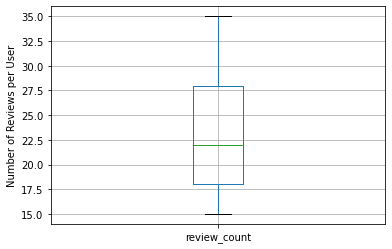

In [127]:
users.boxplot(column ='review_count')
plt.ylabel('Number of Reviews per User')

One of the underlying assumptions of my project is that I can generalize a user's preferences based on their Yelp activity. Specifically, I plan to find out what cuisines/categories a user prefers based on the percentage of reviews that are for restaurants in that category and their average rating for that category. However, many users don't have many reviews, which is a limitation on how well their preferences can be inferred.

#### Friends
For identifying social relationships, the only metric I have on hand is whether or not the two users are friends on Yelp. There is a data gap here in regards to the closeness of the friendship since this is a discrete measurement. As many social media users would know, being "friends" on a social media platform doesn't necessarily mean two individuals are actually close. If they are distant acquaitances, or even strangers, then the likelihood that they have similar tastes and lifestyles decreases, thus weakening my argument. It's hard to determine whether friendships on Yelp (or even in life) are genuine, but I tried to limit the users to those with friend amounts in a range of 20 to 40. This was reasoned by the idea that too few friends would make it hard to draw insights from, while too many friends risks the person not actually being real-life friends with their Yelp friends.

Text(0, 0.5, 'Number of Friends')

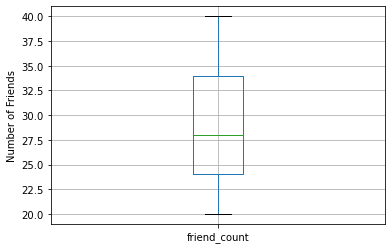

In [128]:
users.boxplot(column ='friend_count')
plt.ylabel('Number of Friends')

This boxplot shows the distribution of users with friends within the range of 20 to 40 people after filtration. However, my dataset practically has users with less that this number of friends since we only use the friends who have a sufficient number of reviews to draw insights on their preferences.

#### Sample Size
After filtering the dataset down to users who have a suitable number of friends and reviews, the size of the dataset shrunk dramatically to only 34 users. The majority of Yelp users do not review many places or have many friends -- which demonstrates how underutilized the friends feature is -- so the model performance may be skewed from the small sample size. In particular, category preferences could change drastically just based on a single review by the user and the average of a users' friend preference might likewise have an undue weight based on a single friend. 

#### Categories
Yelp has over 600 categories that have varying degree of usage. Given that tagging a business as a specific category is a very manual process, there is a lot of room for interpretation and businesses may be improperly labelled or lack a category that they should be labelled for. Because of this, the preference metric may deviate even more from a user's actual preferences and be an unreliable metric to train the model on. 

#### Cuisine Preferences
Currently, I am using the star proportion metric to determine a user's preferences but Yelp actually has an optional preferences survey that users can fill out on their profile as well. Since these preferences would be directly stated by the user rather than my estimations, these could be a more suitable choice as preference metrics in future models. Unfortunately, this information was not included in Yelp's provided dataset but if Yelp ever chose to implement a similar recommendation system, perhaps this datapoint would be more informative or accurate.

***
## Source Code
The complete source code can be found in a [GitHub repository](https://github.com/rachelluuu/info2950-project).

***
## Acknowledgements
This project was made possible using several Python libraries, including numpy, pandas, matplotlib, sklearn, scipy, and statsmodels. I'd also like to give a big thanks to Yelp for supplying the data, my peers who helped review my work, and the INFO 2950 course staff for all their help.

***
## References
<sup>1</sup> https://en.wikipedia.org/wiki/Metcalfe%27s_law <br>
<sup>2</sup> https://www.reviewtrackers.com/blog/yelp-factsheet/<br>
<sup>3</sup> https://www.cnbc.com/2020/09/16/yelp-data-shows-60percent-of-business-closures-due-to-the-coronavirus-pandemic-are-now-permanent.html